# Exploration Data Analysis

Color palette used: https://coolors.co/palette/ef476f-ffd166-06d6a0-118ab2-073b4c

Node related is #FFD166

NumCont related is #EF476F

DURC related is #06D6A0

ICT related is #118AB2

In [ ]:
# dependencies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Cleaning

***

In [2]:
dataset = pd.read_csv('all_scenarios.csv')

In [3]:
dataset.head()

,Node,NumCont,DURC,ICT,Escenari
0,0,25344,27.751563,834.717847,41
1,1,23880,27.000888,840.283571,41
2,2,23560,26.551641,898.175328,41
3,3,25688,20.484634,887.053647,41
4,4,26436,23.837638,856.950681,41


In [4]:
display(dataset.dtypes)

Node          int64
NumCont       int64
DURC        float64
ICT         float64
Escenari      int64
dtype: object

In [5]:
dataset.isnull().sum()

Node        0
NumCont     0
DURC        0
ICT         0
Escenari    0
dtype: int64

In [6]:
# fill null values
dataset["DURC"] = dataset["DURC"].fillna(0)
dataset["ICT"] = dataset["ICT"].fillna(0)

In [7]:
dataset.isnull().sum()

Node        0
NumCont     0
DURC        0
ICT         0
Escenari    0
dtype: int64

## Exploration of its attributes

***

In [8]:
# # the first step will be to separate the attribute matrix and the target, since the PCA is an unsupervised method
# y = dataset["Escenari"]
# dataset.drop(["Escenari"], axis=1, inplace=True)
# X = dataset

#### Correlation

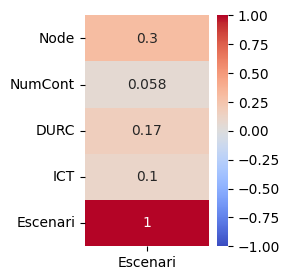

In [9]:
# this heatmap shows us the correlation between the different columns with the target (named 'Type')
plt.figure(figsize=(2,3)) 

sns.heatmap(dataset.corr()[['Escenari']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

plt.savefig("corr_dataset.png", dpi = 300, bbox_inches = 'tight')
plt.show()

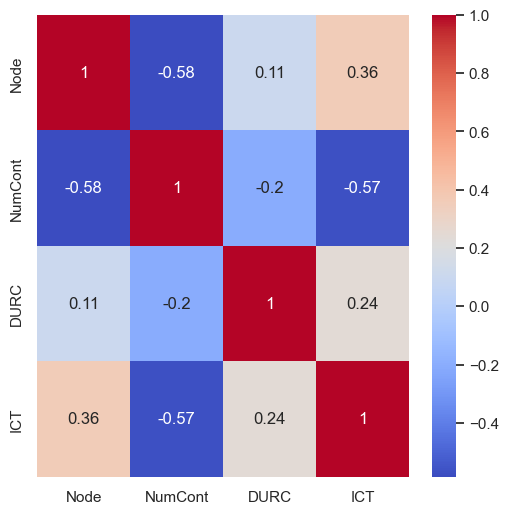

In [51]:
plt.figure(figsize=(6,6)) 

sns.heatmap(dataset.corr(numeric_only=True), annot = True, cmap = 'coolwarm')

plt.show()

#### Attribute distribution grouped by scenario

In [10]:
dataset["Escenari"] = dataset["Escenari"].astype('category')

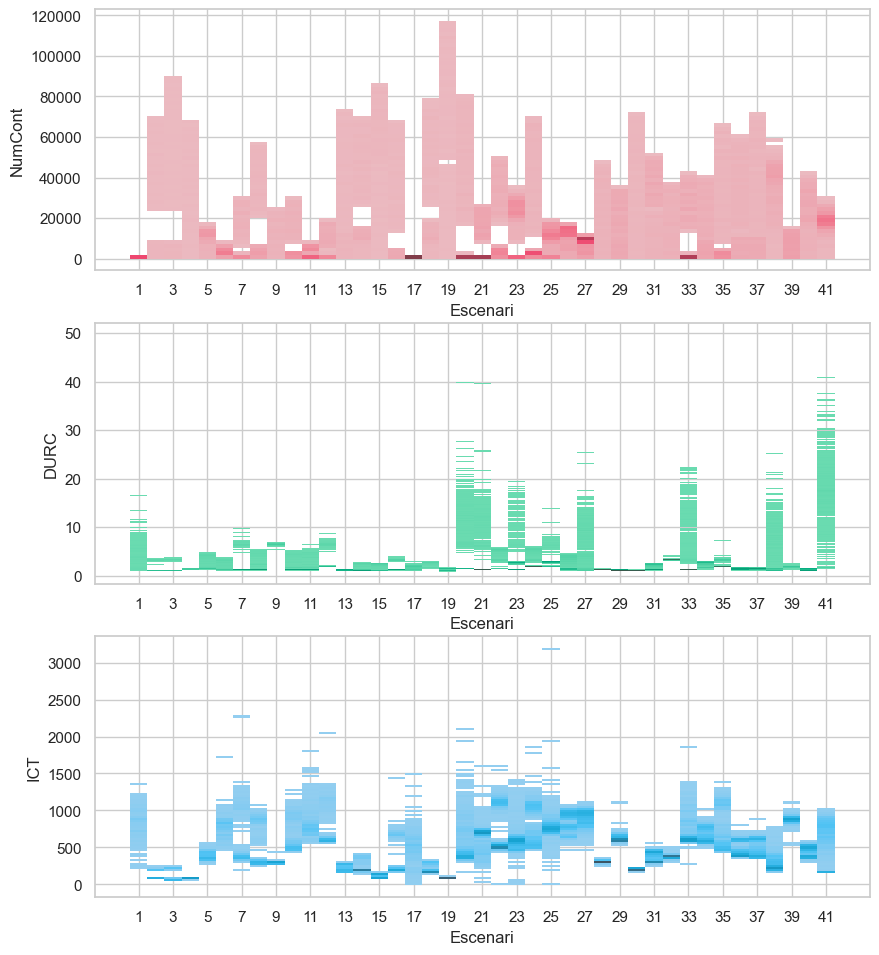

In [35]:
# histogrames per a la visualitzacio d'attrs

sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
plt.subplots_adjust(top=0.85)
axs[0].set_xticks([i for i in range(1, 42, 2)])
axs[1].set_xticks([i for i in range(1, 42, 2)])
axs[2].set_xticks([i for i in range(1, 42, 2)])
s2=sns.histplot(data=dataset, x="Escenari", y="NumCont", color="#EF476F", ax=axs[0])
s3=sns.histplot(data=dataset, x="Escenari", y="DURC", color="#06D6A0", ax=axs[1])
s4=sns.histplot(data=dataset, x="Escenari", y="ICT", color="#118AB2", ax=axs[2])

In [28]:
# get the total nodes in each scenario
import numpy as np
nodes_by_esc = dataset.groupby(['Escenari']).agg(NumComponents = ("Node", np.max)).reset_index()
nodes_by_esc.head()

,Escenari,NumComponents
0,1,238
1,2,190
2,3,190
3,4,190
4,5,382


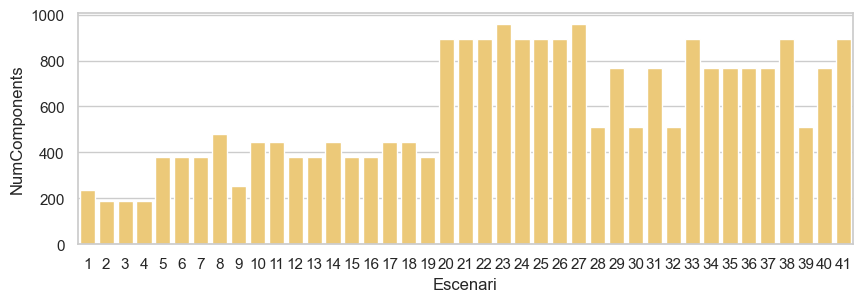

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,3)) 

sns.barplot(data=nodes_by_esc, x="Escenari", y="NumComponents", color="#ffd166")
# plt.savefig("corr_dataset.png", dpi = 300, bbox_inches = 'tight')
plt.show()

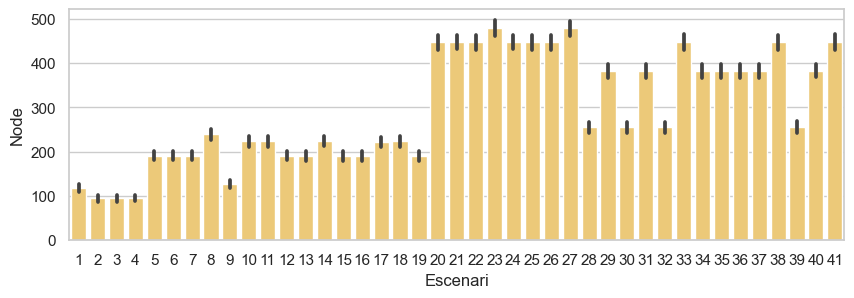

In [36]:
plt.figure(figsize=(10,3)) 

sns.barplot(data=dataset, x="Escenari", y="Node", color="#ffd166")
# plt.savefig("corr_dataset.png", dpi = 300, bbox_inches = 'tight')
plt.show()

#### Boxplots

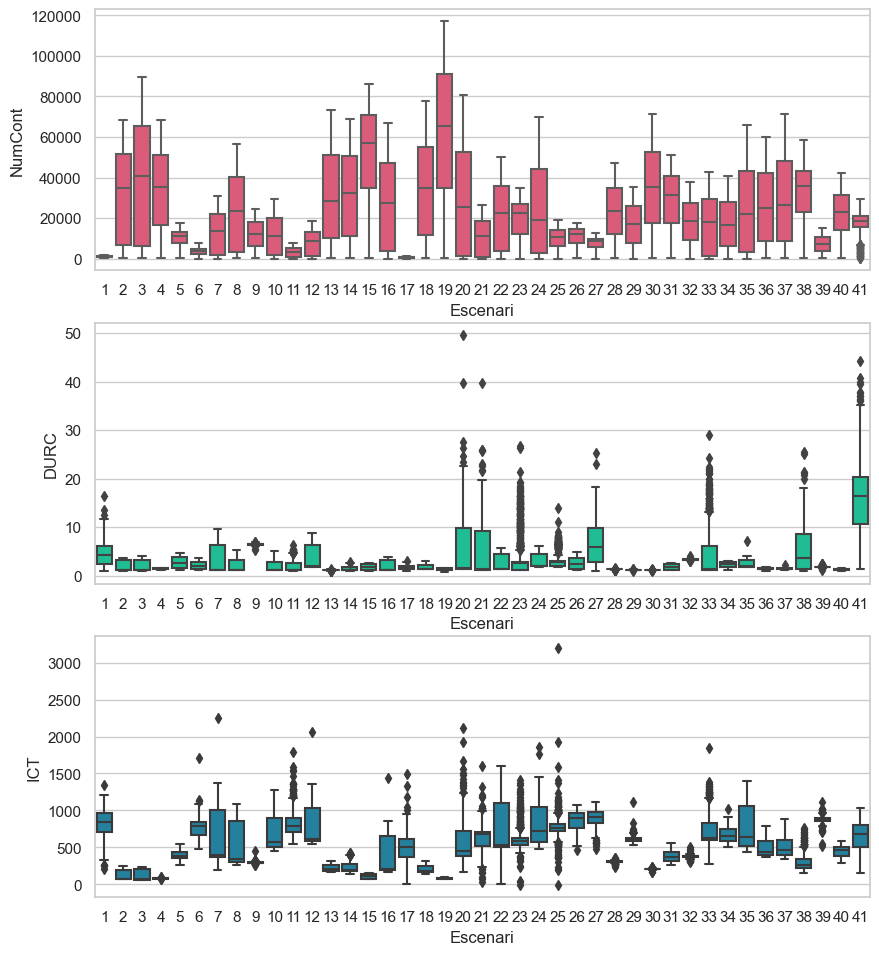

In [40]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
plt.subplots_adjust(top=0.85)
# axs[0].set_xticks([i for i in range(1, 42, 2)])
# axs[1].set_xticks([i for i in range(1, 42, 2)])
# axs[2].set_xticks([i for i in range(1, 42, 2)])
s2=sns.boxplot(data=dataset, x="Escenari", y="NumCont", color="#EF476F", ax=axs[0])
s3=sns.boxplot(data=dataset, x="Escenari", y="DURC", color="#06D6A0", ax=axs[1])
s4=sns.boxplot(data=dataset, x="Escenari", y="ICT", color="#118AB2", ax=axs[2])

The DURC attribute is the one with less variation, yet somehow the one that correlates more with its scenario.

#### Scatter plot

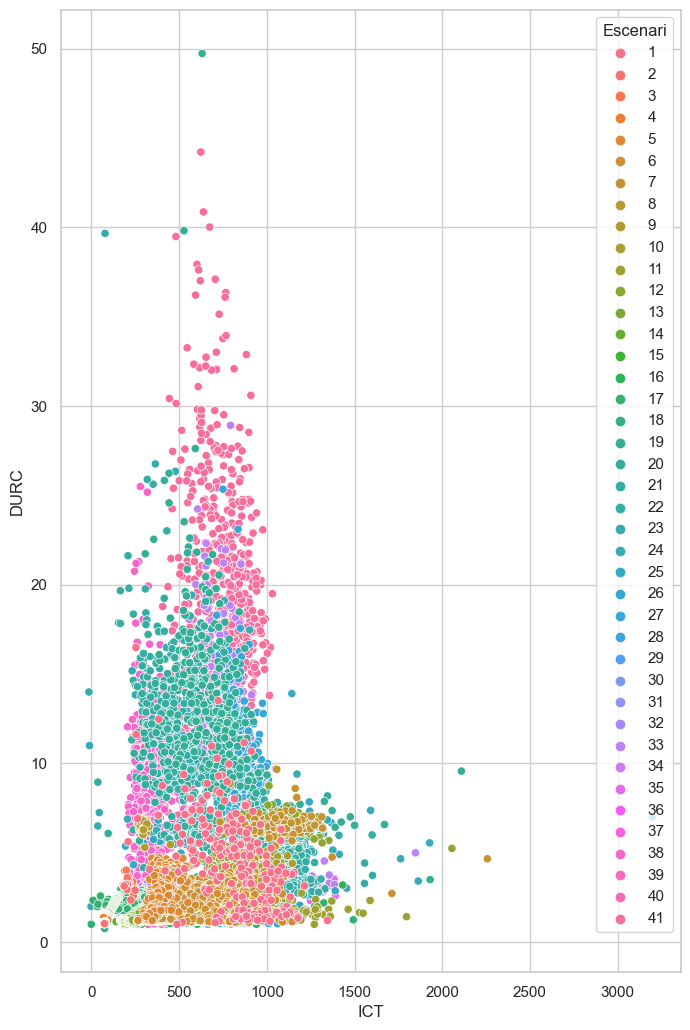

In [47]:
plt.figure(figsize=(8,12.5)) 

sns.scatterplot(data=dataset, x="ICT", y="DURC", hue="Escenari")
# plt.savefig("corr_dataset.png", dpi = 300, bbox_inches = 'tight')
plt.show()

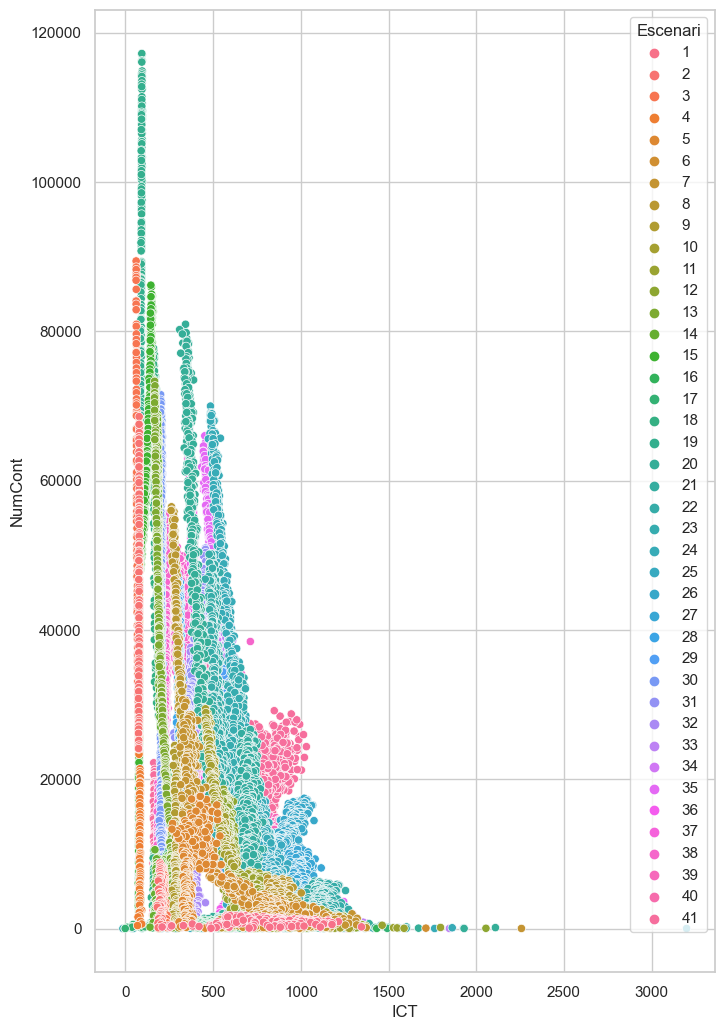

In [48]:
plt.figure(figsize=(8,12.5)) 

sns.scatterplot(data=dataset, x="ICT", y="NumCont", hue="Escenari")
# plt.savefig("corr_dataset.png", dpi = 300, bbox_inches = 'tight')
plt.show()